In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL.Image import alpha_composite
from sklearn.datasets import make_classification,make_moons,make_circles,load_breast_cancer,load_diabetes
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
np.random.seed(42)

In [2]:
# sample dataset
X,y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    random_state=42
)

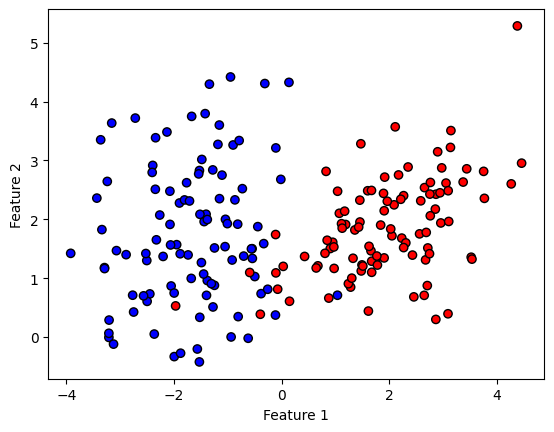

In [3]:
# visualize the dataset
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
# splitting and scalling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
svm = SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)
acc = accuracy_score(y_test,y_pred)
acc

0.975

In [6]:
# helper function to plot decision boundary
def plot_decision_boundary(model,X,y,title = 'Decision boundary'):
    x_min,x_max = X[:,0].min() - 1,X[:,0].max() + 1
    y_min,y_max = X[:,1].min() - 1,X[:,1].max() + 1

    xx,yy = np.meshgrid(
        np.linspace(x_min,x_max,300),
        np.linspace(y_min,y_max,300)
    )

    grid = np.c_[xx.ravel(),yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,alpha = .2,cmap = 'bwr')
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors='k',alpha=.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

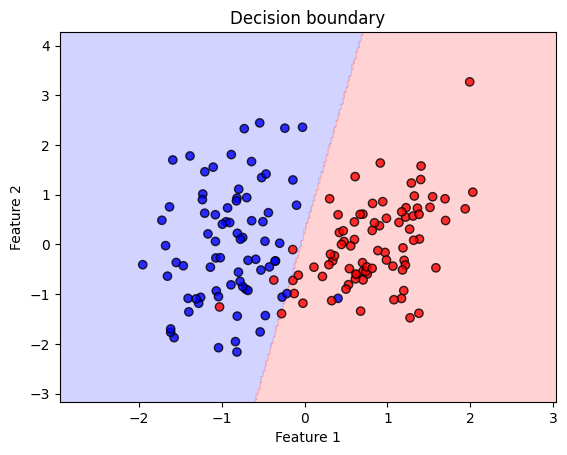

In [7]:
# visualize linear SVM boundary
plot_decision_boundary(svm,X_train_scaled,y_train)

##### Moon Dataset

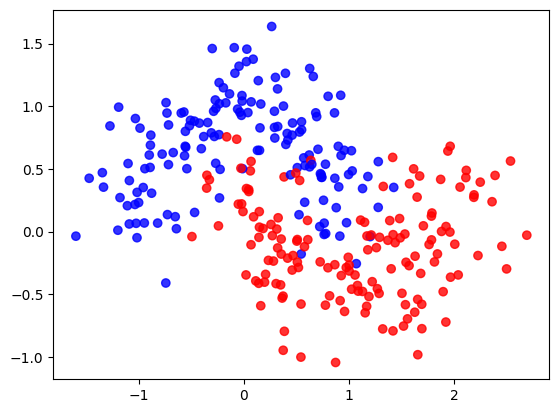

In [8]:
X,y = make_moons(n_samples=300,noise=.25,random_state=42)

plt.scatter(X[:,0],X[:,1],c = y, cmap='bwr',alpha=.8)
plt.show()

In [9]:
# scalling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

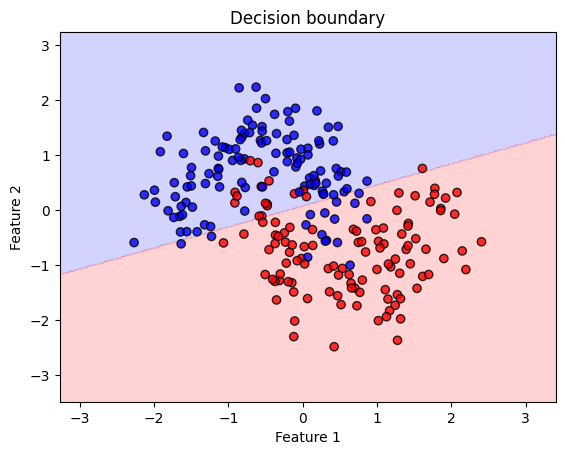

0.8666666666666667


In [10]:
# Linear kernels on moons
svc = SVC(kernel='linear',C=1.0,random_state=42)
svc.fit(X,y)
plot_decision_boundary(svc,X_train_scaled,y_train)
print(accuracy_score(y_test,svc.predict(X_test_scaled)))

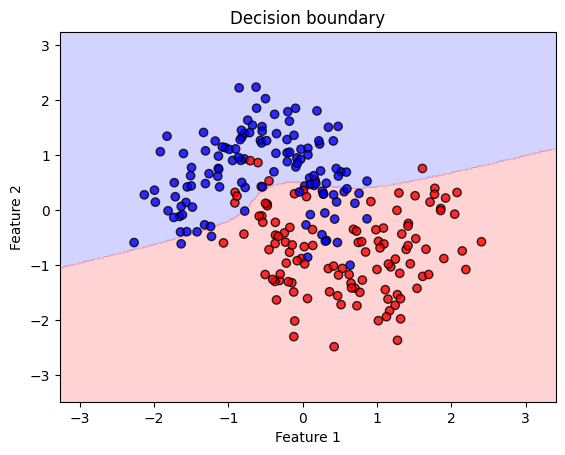

0.85


In [14]:
# Polynomial kernel
svc = SVC(kernel='poly',C=10.0,random_state=42,degree=3,gamma='scale')
svc.fit(X,y)
plot_decision_boundary(svc,X_train_scaled,y_train)
print(accuracy_score(y_test,svc.predict(X_test_scaled)))

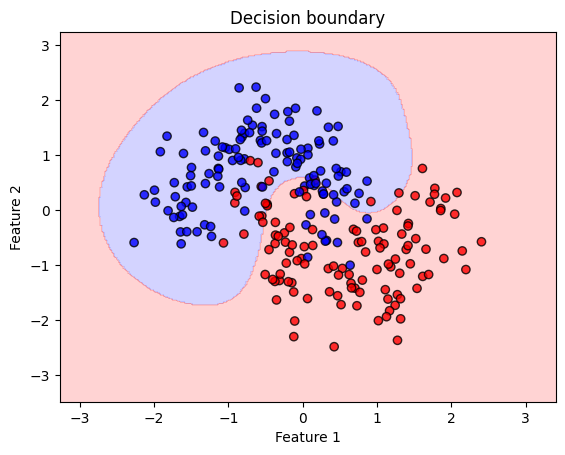

0.8666666666666667


In [18]:
# RBF kernel on moon
svc = SVC(kernel='rbf',C=10.0,random_state=42,gamma=1.0)
svc.fit(X,y)
plot_decision_boundary(svc,X_train_scaled,y_train)
print(accuracy_score(y_test,svc.predict(X_test_scaled)))

##### Breast cancer dataset

In [23]:
cancer = load_breast_cancer()
X,y = cancer.data, cancer.target
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [24]:
# splitting and scalling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
svc = SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42)
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=cancer.target_names))

0.9824561403508771
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [31]:
#comfusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  1],
       [ 1, 71]])

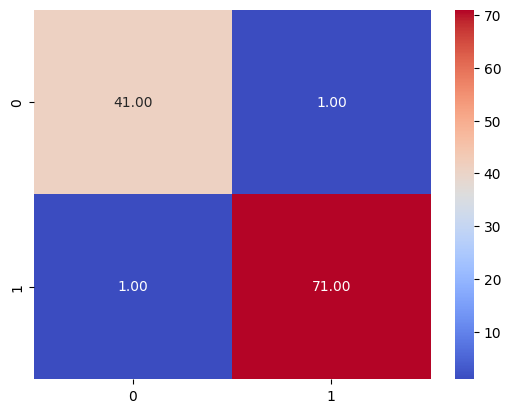

In [37]:
sns.heatmap(data=cm,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()